num_seeds : 12
num_episodes : 1000


/var/folders/w9/pv3pm_c55ts0y50r_p4hb96w0000gn/T/ipykernel_44601/2832940568.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  all_rewards = np.array(data['rewards'])  # shape: (num_seeds, num_episodes)


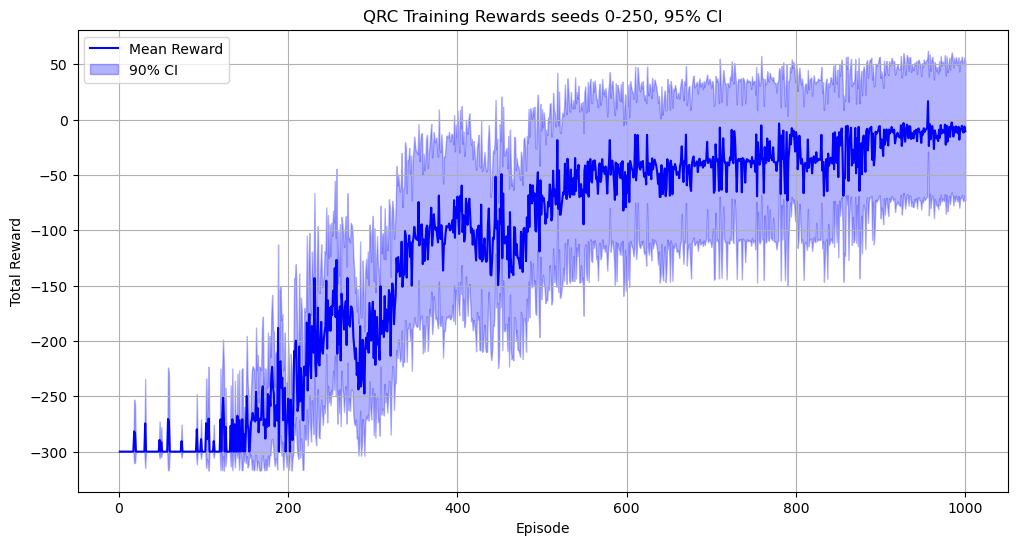

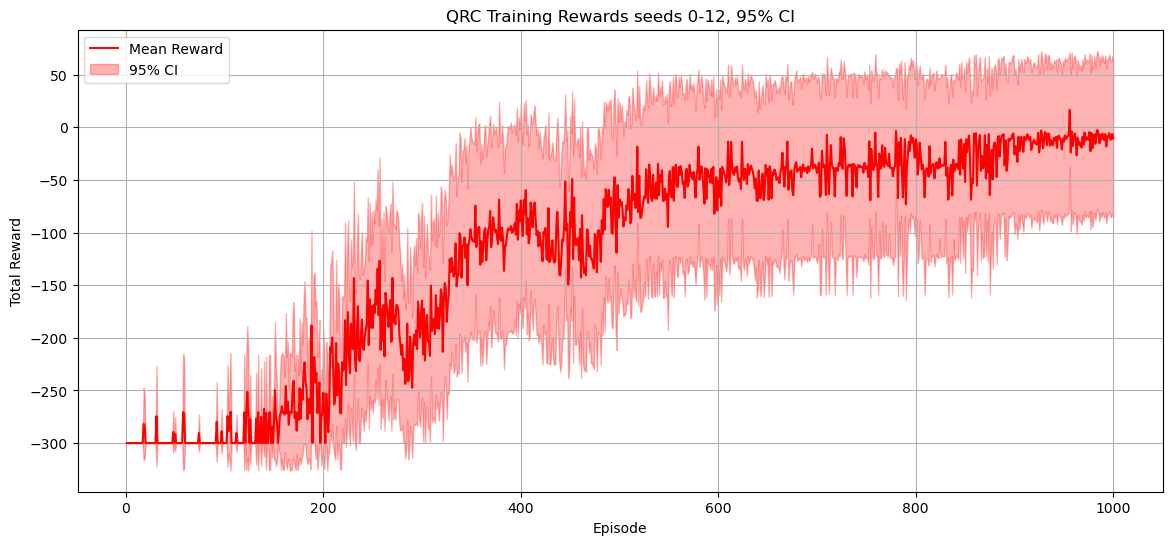

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the saved rewards
os.makedirs("../data", exist_ok=True)

pt_file = "../data/qrc_reward_seeds.pt"
# pt_file = "../data/qrc_reward_seeds_old.pt"
data = torch.load(pt_file)
all_rewards = np.array(data['rewards'])  # shape: (num_seeds, num_episodes)

# Ensure 2D shape
if all_rewards.ndim == 1:
    all_rewards = all_rewards.reshape(1, -1)

num_seeds, num_episodes = all_rewards.shape
print("num_seeds :", num_seeds)
print("num_episodes :", num_episodes)

# Compute mean and std across seeds
mean_rewards = np.mean(all_rewards, axis=0)
std_rewards = np.std(all_rewards, axis=0)

episodes = np.arange(1, num_episodes + 1)

# 90% confidence interval
ci_90 = 1.645 * (std_rewards / np.sqrt(num_seeds))
plt.figure(figsize=(12,6))
sns.lineplot(x=episodes, y=mean_rewards, label="Mean Reward", color="blue")
plt.fill_between(episodes, mean_rewards - ci_90, mean_rewards + ci_90,
                 alpha=0.3, color="blue", label="90% CI")
plt.title(f"QRC Training Rewards seeds 0-{num_seeds}, 95% CI")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.legend()
plt.show()

# 95% confidence interval
ci_95 = 1.96 * (std_rewards / np.sqrt(num_seeds))
plt.figure(figsize=(14,6))
sns.lineplot(x=episodes, y=mean_rewards, label="Mean Reward", color="red")
plt.fill_between(episodes, mean_rewards - ci_95, mean_rewards + ci_95,
                 alpha=0.3, color="red", label="95% CI")
plt.title(f"QRC Training Rewards seeds 0-{num_seeds}, 95% CI")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.legend()
plt.show()
